<img src="téléchargement.png">

# Projet 04 du parcours data scientist

## Anticipez les besoins en consommation de bâtiments 

<img src="images.png">, <img src="téléchargement_2.png"> 

###  objectifs

### Plan

### I-Mise en place 

In [1]:
!pip install folium

In [1]:
import pandas as pd
import numpy as np

import missingno as msn

import ast #traiter la grammaire abstraite de l'arbre syntaxique Python

import matplotlib.pyplot as plt

import seaborn as sns

import folium #Etablir des maps
import folium.plugins

import re

from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats

from math import radians, cos, sin, asin, sqrt

### II-La donnée brute 

In [65]:
beb_df_2015 = pd.read_csv('./datasets/2015-building-energy-benchmarking.csv')

In [66]:
beb_df_2016 = pd.read_csv('./datasets/2016-building-energy-benchmarking.csv')

In [4]:
print(f'beb_df_2015 contient {beb_df_2015.shape[0]} lignes et {beb_df_2015.shape[1]} colonnes')

beb_df_2015 contient 3340 lignes et 47 colonnes


In [5]:
print(f'beb_df_2016 contient {beb_df_2016.shape[0]} lignes et {beb_df_2016.shape[1]} colonnes')

beb_df_2016 contient 3376 lignes et 46 colonnes


In [133]:
beb_df_2015.head(5)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   
3              5      2015  NonResidential               Hotel   
4              8      2015  NonResidential               Hotel   

            PropertyName TaxParcelIdentificationNumber  \
0   MAYFLOWER PARK HOTEL                     659000030   
1        PARAMOUNT HOTEL                     659000220   
2           WESTIN HOTEL                     659000475   
3              HOTEL MAX                     659000640   
4  WARWICK SEATTLE HOTEL                     659000970   

                                            Location  CouncilDistrictCode  \
0  {'latitude': '47.61219025', 'longitude': '-122...                    7   
1  {'latitude': '47.61310583', 'longitude': '-122...                    7   
2  {'latitude': '47.61334897', 'longitude': '-122...                    7   
3  {'latitude': '47.61421585', 'longitude': '-122...                    7   
4  {'latitude': '47.6137544', 'longitude': '-122....                    7   

  Neighborhood  YearBuilt  ...  GHGEmissionsIntensity(kgCO2e/ft2)  \
0     DOWNTOWN       1927  ...                               2.64   
1     DOWNTOWN       1996  ...                               2.38   
2     DOWNTOWN       1969  ...                               1.92   
3     DOWNTOWN       1926  ...                              31.38   
4     DOWNTOWN       1980  ...                               4.02   

   DefaultData  Comment  ComplianceStatus       Outlier 2010 Census Tracts  \
0           No      NaN         Compliant           NaN                NaN   
1           No      NaN         Compliant           NaN                NaN   
2          Yes      NaN         Compliant           NaN                NaN   
3           No      NaN         Compliant  High Outlier                NaN   
4           No      NaN         Compliant           NaN                NaN   

  Seattle Police Department Micro Community Policing Plan Areas  \
0                                               14.0              
1                                               14.0              
2                                               56.0              
3                                               56.0              
4                                               56.0              

   City Council Districts SPD Beats  Zip Codes  
0                     NaN      31.0      18081  
1                     NaN      31.0      18081  
2                     NaN      31.0      18081  
3                     NaN      31.0      18081  
4                     NaN      31.0      19576  

[5 rows x 47 columns]

In [134]:
beb_df_2016.head(5)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

In [135]:
beb_df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [136]:
beb_df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [137]:
beb_df_2015.dtypes

OSEBuildingID                                                      int64
DataYear                                                           int64
BuildingType                                                      object
PrimaryPropertyType                                               object
PropertyName                                                      object
TaxParcelIdentificationNumber                                     object
Location                                                          object
CouncilDistrictCode                                                int64
Neighborhood                                                      object
YearBuilt                                                          int64
NumberofBuildings                                                  int64
NumberofFloors                                                   float64
PropertyGFATotal                                                   int64
PropertyGFAParking                                 

In [138]:
beb_df_2016.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [139]:
beb_df_2015.isna().sum()

OSEBuildingID                                                       0
DataYear                                                            0
BuildingType                                                        0
PrimaryPropertyType                                                 0
PropertyName                                                        0
TaxParcelIdentificationNumber                                       2
Location                                                            0
CouncilDistrictCode                                                 0
Neighborhood                                                        0
YearBuilt                                                           0
NumberofBuildings                                                   0
NumberofFloors                                                      8
PropertyGFATotal                                                    0
PropertyGFAParking                                                  0
PropertyGFABuilding(

In [140]:
beb_df_2016.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [141]:
beb_df_2015.isna().mean()*100

OSEBuildingID                                                     0.000000
DataYear                                                          0.000000
BuildingType                                                      0.000000
PrimaryPropertyType                                               0.000000
PropertyName                                                      0.000000
TaxParcelIdentificationNumber                                     0.059880
Location                                                          0.000000
CouncilDistrictCode                                               0.000000
Neighborhood                                                      0.000000
YearBuilt                                                         0.000000
NumberofBuildings                                                 0.000000
NumberofFloors                                                    0.239521
PropertyGFATotal                                                  0.000000
PropertyGFAParking       

In [142]:
beb_df_2016.isna().mean()*100

OSEBuildingID                        0.000000
DataYear                             0.000000
BuildingType                         0.000000
PrimaryPropertyType                  0.000000
PropertyName                         0.000000
Address                              0.000000
City                                 0.000000
State                                0.000000
ZipCode                              0.473934
TaxParcelIdentificationNumber        0.000000
CouncilDistrictCode                  0.000000
Neighborhood                         0.000000
Latitude                             0.000000
Longitude                            0.000000
YearBuilt                            0.000000
NumberofBuildings                    0.236967
NumberofFloors                       0.000000
PropertyGFATotal                     0.000000
PropertyGFAParking                   0.000000
PropertyGFABuilding(s)               0.000000
ListOfAllPropertyUseTypes            0.266588
LargestPropertyUseType            

In [143]:
beb_df_2015.duplicated().sum()

0

In [144]:
beb_df_2016.duplicated().sum()

0

In [145]:
beb_df_2015.nunique()

OSEBuildingID                                                    3340
DataYear                                                            1
BuildingType                                                        7
PrimaryPropertyType                                                27
PropertyName                                                     3287
TaxParcelIdentificationNumber                                    3245
Location                                                         3298
CouncilDistrictCode                                                 7
Neighborhood                                                       13
YearBuilt                                                         113
NumberofBuildings                                                  10
NumberofFloors                                                     50
PropertyGFATotal                                                 3150
PropertyGFAParking                                                908
PropertyGFABuilding(

In [146]:
beb_df_2016.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


In [147]:
beb_df_2015.describe().transpose()

count          mean  \
OSEBuildingID                                       3340.0  2.052217e+04   
DataYear                                            3340.0  2.015000e+03   
CouncilDistrictCode                                 3340.0  4.450898e+00   
YearBuilt                                           3340.0  1.967625e+03   
NumberofBuildings                                   3340.0  1.035629e+00   
NumberofFloors                                      3332.0  4.682173e+00   
PropertyGFATotal                                    3340.0  9.077289e+04   
PropertyGFAParking                                  3340.0  1.105403e+04   
PropertyGFABuilding(s)                              3340.0  7.971886e+04   
LargestPropertyUseTypeGFA                           3204.0  7.488154e+04   
SecondLargestPropertyUseTypeGFA                     1559.0  2.767565e+04   
ThirdLargestPropertyUseTypeGFA                       560.0  1.075571e+04   
ENERGYSTARScore                                     2560.0  6.789414e+01   
SiteEUI(kBtu/sf)                                    3330.0  5.362613e+01   
SiteEUIWN(kBtu/sf)                                  3330.0  5.758655e+01   
SourceEUI(kBtu/sf)                                  3330.0  1.327797e+02   
SourceEUIWN(kBtu/sf)                                3330.0  1.389360e+02   
SiteEnergyUse(kBtu)                                 3330.0  4.983106e+06   
SiteEnergyUseWN(kBtu)                               3330.0  5.203055e+06   
SteamUse(kBtu)                                      3330.0  2.502851e+05   
Electricity(kWh)                                    3330.0  1.017897e+06   
Electricity(kBtu)                                   3330.0  3.473209e+06   
NaturalGas(therms)                                  3330.0  1.253304e+04   
NaturalGas(kBtu)                                    3330.0  1.253304e+06   
OtherFuelUse(kBtu)                                  3330.0  7.142301e+03   
GHGEmissions(MetricTonsCO2e)                        3330.0  1.100941e+02   
GHGEmissionsIntensity(kgCO2e/ft2)                   3330.0  9.853393e-01   
2010 Census Tracts                                   224.0  1.230625e+02   
Seattle Police Department Micro Community Polic...  3338.0  3.238017e+01   
City Council Districts                               213.0  1.347418e+00   
SPD Beats                                           3338.0  2.482564e+01   
Zip Codes                                           3340.0  1.878668e+04   

                                                             std      min  \
OSEBuildingID                                       1.151152e+04      1.0   
DataYear                                            0.000000e+00   2015.0   
CouncilDistrictCode                                 2.127203e+00      1.0   
YearBuilt                                           3.294985e+01   1900.0   
NumberofBuildings                                   7.844628e-01      1.0   
NumberofFloors                                      5.458460e+00      0.0   
PropertyGFATotal                                    1.493058e+05  20000.0   
PropertyGFAParking                                  3.529633e+04     -3.0   
PropertyGFABuilding(s)                              1.292314e+05 -50550.0   
LargestPropertyUseTypeGFA                           1.236249e+05   5872.0   
SecondLargestPropertyUseTypeGFA                     5.248084e+04      0.0   
ThirdLargestPropertyUseTypeGFA                      2.261853e+04      0.0   
ENERGYSTARScore                                     2.715406e+01      1.0   
SiteEUI(kBtu/sf)                                    5.389331e+01      0.0   
SiteEUIWN(kBtu/sf)                                  5.560496e+01      0.0   
SourceEUI(kBtu/sf)                                  1.319432e+02     -2.0   
SourceEUIWN(kBtu/sf)                                1.313591e+02     -2.0   
SiteEnergyUse(kBtu)                                 1.375330e+07      0.0   
SiteEnergyUseWN(kBtu)                               1.400757e+07      0.0   
Stea

In [148]:
beb_df_2016.describe().transpose()

count          mean           std  \
OSEBuildingID                    3376.0  2.120899e+04  1.222376e+04   
DataYear                         3376.0  2.016000e+03  0.000000e+00   
ZipCode                          3360.0  9.811695e+04  1.861520e+01   
CouncilDistrictCode              3376.0  4.439277e+00  2.120625e+00   
Latitude                         3376.0  4.762403e+01  4.775842e-02   
Longitude                        3376.0 -1.223348e+02  2.720329e-02   
YearBuilt                        3376.0  1.968573e+03  3.308816e+01   
NumberofBuildings                3368.0  1.106888e+00  2.108402e+00   
NumberofFloors                   3376.0  4.709123e+00  5.494465e+00   
PropertyGFATotal                 3376.0  9.483354e+04  2.188376e+05   
PropertyGFAParking               3376.0  8.001526e+03  3.232672e+04   
PropertyGFABuilding(s)           3376.0  8.683201e+04  2.079398e+05   
LargestPropertyUseTypeGFA        3356.0  7.917764e+04  2.017034e+05   
SecondLargestPropertyUseTypeGFA  1679.0  2.844408e+04  5.439292e+04   
ThirdLargestPropertyUseTypeGFA    596.0  1.173868e+04  2.933120e+04   
ENERGYSTARScore                  2533.0  6.791867e+01  2.687327e+01   
SiteEUI(kBtu/sf)                 3369.0  5.473212e+01  5.627312e+01   
SiteEUIWN(kBtu/sf)               3370.0  5.703380e+01  5.716333e+01   
SourceEUI(kBtu/sf)               3367.0  1.342328e+02  1.392876e+02   
SourceEUIWN(kBtu/sf)             3367.0  1.377839e+02  1.391098e+02   
SiteEnergyUse(kBtu)              3371.0  5.403667e+06  2.161063e+07   
SiteEnergyUseWN(kBtu)            3370.0  5.276726e+06  1.593879e+07   
SteamUse(kBtu)                   3367.0  2.745959e+05  3.912173e+06   
Electricity(kWh)                 3367.0  1.086639e+06  4.352478e+06   
Electricity(kBtu)                3367.0  3.707612e+06  1.485066e+07   
NaturalGas(therms)               3367.0  1.368505e+04  6.709781e+04   
NaturalGas(kBtu)                 3367.0  1.368505e+06  6.709781e+06   
Comments                            0.0           NaN           NaN   
TotalGHGEmissions                3367.0  1.197240e+02  5.388322e+02   
GHGEmissionsIntensity            3367.0  1.175916e+00  1.821452e+00   

                                          min            25%           50%  \
OSEBuildingID                         1.00000   19990.750000  2.311200e+04   
DataYear                           2016.00000    2016.000000  2.016000e+03   
ZipCode                           98006.00000   98105.000000  9.811500e+04   
CouncilDistrictCode                   1.00000       3.000000  4.000000e+00   
Latitude                             47.49917      47.599860  4.761867e+01   
Longitude                          -122.41425    -122.350662 -1.223325e+02   
YearBuilt                          1900.00000    1948.000000  1.975000e+03   
NumberofBuildings                     0.00000       1.000000  1.000000e+00   
NumberofFloors                        0.00000       2.000000  4.000000e+00   
PropertyGFATotal                  11285.00000   28487.000000  4.417500e+04   
PropertyGFAParking                    0.00000       0.000000  0.000000e+00   
PropertyGFABuilding(s)             3636.00000   27756.000000  4.321600e+04   
LargestPropertyUseTypeGFA          5656.00000   25094.750000  3.989400e+04   
SecondLargestPropertyUseTypeGFA       0.00000    5000.000000  1.066400e+04   
ThirdLargestPropertyUseTypeGFA        0.00000    2239.000000  5.043000e+03   
ENERGYSTARScore                       1.00000      53.000000  7.500000e+01   
SiteEUI(kBtu/sf)                      0.00000      27.900000  3.860000e+01   
SiteEUIWN(kBtu/sf)                    0.00000      29.400000  4.090000e+01   
SourceEUI(kBtu/sf)                    0.00000      74.699997  9.620000e+01   
SourceEUIWN(kBtu/sf)                 -2.10000      78.400002  1.011000e+02   
SiteEnergyUse(kBtu)                   0.00000  925128.593750  1.803753e+06   
SiteEnergyUseWN(kBtu)                 0.00000  970182.234375  1.904452e+06   
SteamUse(kBtu)                        

<AxesSubplot:>

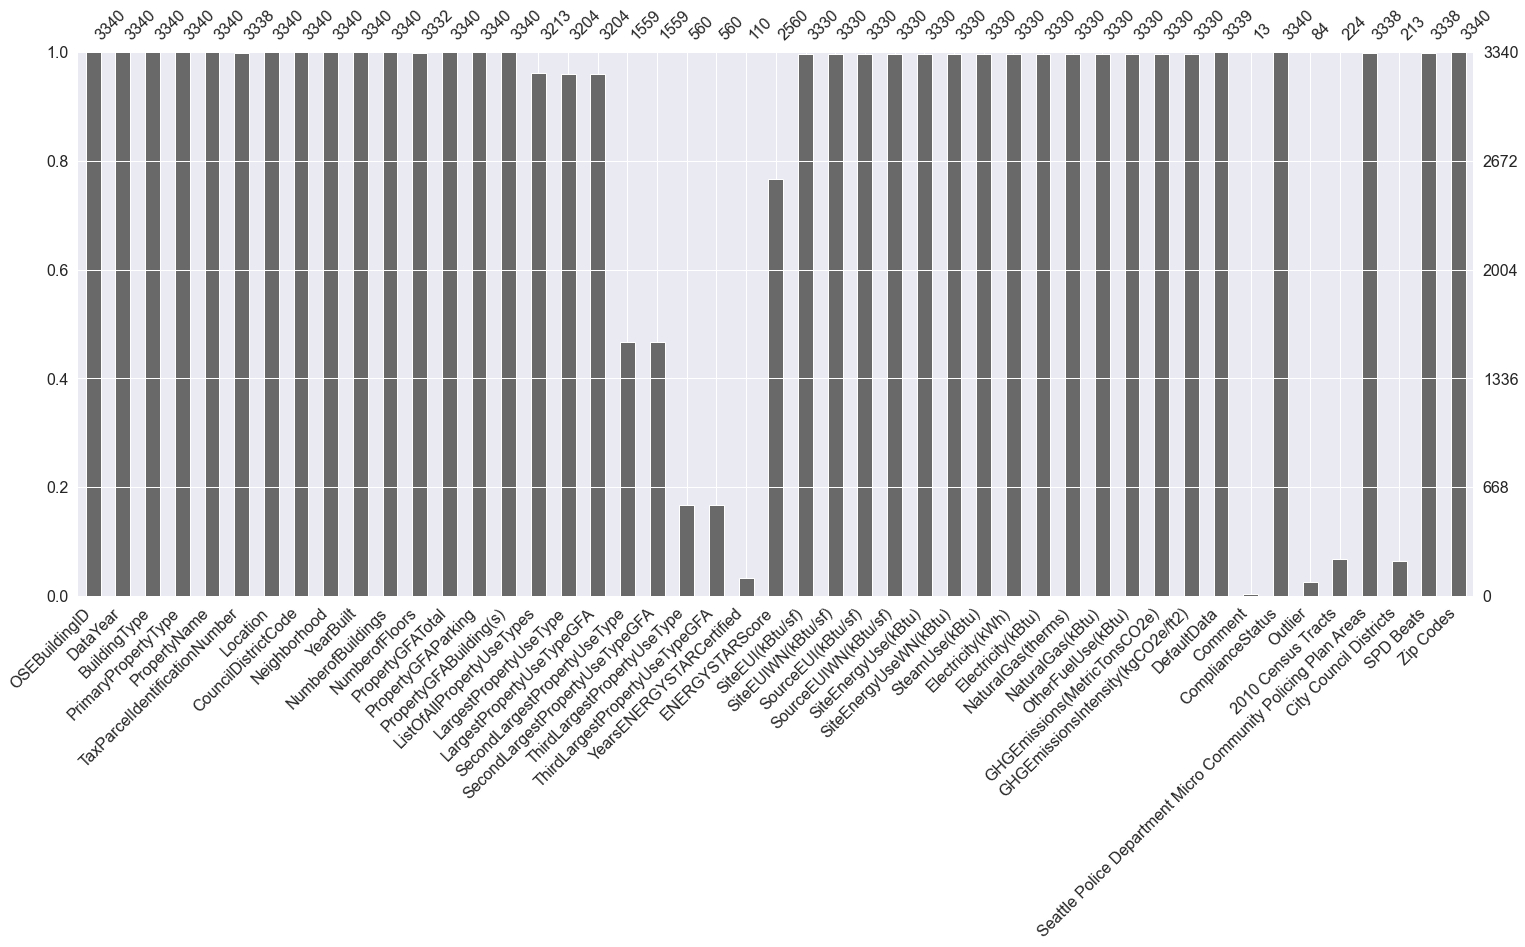

In [149]:
msn.bar(beb_df_2015)

<AxesSubplot:>

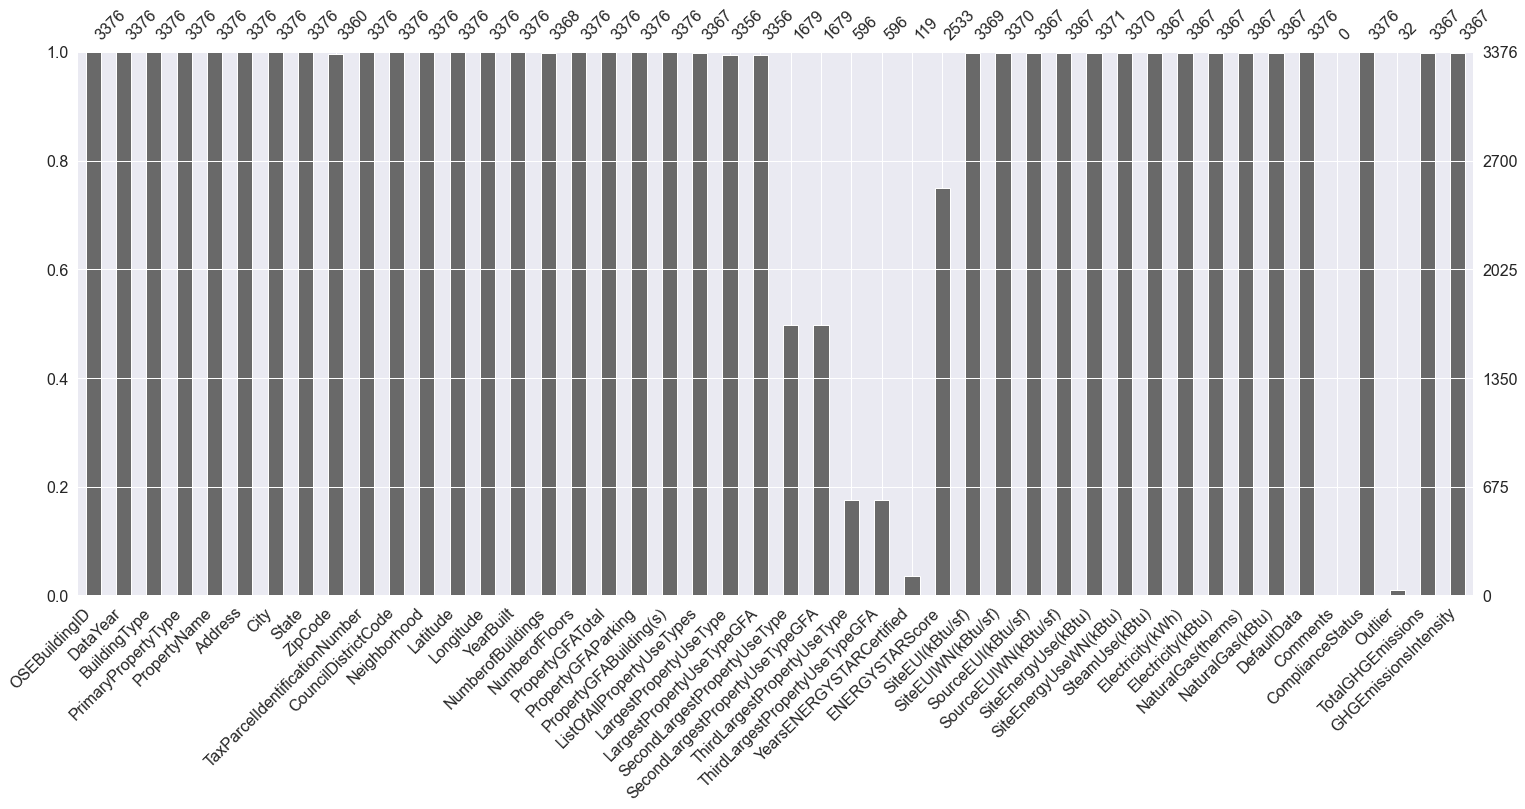

In [150]:
msn.bar(beb_df_2016)

### III-Comparaison entre données 2015 et 2016 

In [67]:
list1 = list(beb_df_2015.columns)
list2 = list(beb_df_2016.columns)

def data_comp (list1, list2):
    return list1 == list2

print(data_comp (list1, list2))

False


In [68]:
def column_diff (list1, list2):
      list1_list2_diff = list(set(list1) - set(list2))
      list2_list1_diff = list(set(list2) - set(list1))
      return list1_list2_diff , list2_list1_diff

In [69]:
print("Les colonnes présentes dans le fichier 2015 et absentes du fichier 2016 sont :")
column_diff(list1, list2)[0]

Les colonnes présentes dans le fichier 2015 et absentes du fichier 2016 sont :


['SPD Beats',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'Location',
 'City Council Districts',
 '2010 Census Tracts',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment',
 'Zip Codes',
 'Seattle Police Department Micro Community Policing Plan Areas']

In [154]:
print("Les colonnes présentes dans le fichier 2016 et absentes du fichier 2015 sont :")
column_diff(list1, list2)[1]

Les colonnes présentes dans le fichier 2016 et absentes du fichier 2015 sont :


['Longitude',
 'ZipCode',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'TotalGHGEmissions',
 'Address',
 'State',
 'City']

### III-1-Ajustement des données de localisation de l'année 2015 

In [70]:
#Aperçu du contenu de la variable 'Location'
beb_df_2015['Location'][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [71]:
beb_df_2015['Location'] = [ast.literal_eval(str(item)) for index, item in beb_df_2015.Location.iteritems()]
beb_df_2015 = pd.concat([beb_df_2015.drop(['Location'], axis=1), beb_df_2015['Location'].apply(pd.Series)], axis=1)
beb_df_2015['human_address'] = [ast.literal_eval(str(item)) for index, item in beb_df_2015.human_address.iteritems()]
beb_df_2015 = pd.concat([beb_df_2015.drop(['human_address'], axis=1), beb_df_2015['human_address'].apply(pd.Series)], axis=1)
beb_df_2015.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   
3              5      2015  NonResidential               Hotel   
4              8      2015  NonResidential               Hotel   

            PropertyName TaxParcelIdentificationNumber  CouncilDistrictCode  \
0   MAYFLOWER PARK HOTEL                     659000030                    7   
1        PARAMOUNT HOTEL                     659000220                    7   
2           WESTIN HOTEL                     659000475                    7   
3              HOTEL MAX                     659000640                    7   
4  WARWICK SEATTLE HOTEL                     659000970                    7   

  Neighborhood  YearBuilt  NumberofBuildings  ...  \
0     DOWNTOWN       1927                  1  ...   
1     DOWNTOWN       1996                  1  ...   
2     DOWNTOWN       1969                  1  ...   
3     DOWNTOWN       1926                  1  ...   
4     DOWNTOWN       1980                  1  ...   

   Seattle Police Department Micro Community Policing Plan Areas  \
0                                               14.0               
1                                               14.0               
2                                               56.0               
3                                               56.0               
4                                               56.0               

   City Council Districts  SPD Beats  Zip Codes     latitude      longitude  \
0                     NaN       31.0      18081  47.61219025  -122.33799744   
1                     NaN       31.0      18081  47.61310583  -122.33335756   
2                     NaN       31.0      18081  47.61334897  -122.33769944   
3                     NaN       31.0      18081  47.61421585  -122.33660889   
4                     NaN       31.0      19576   47.6137544   -122.3409238   

          address     city  state    zip  
0   405 OLIVE WAY  SEATTLE     WA  98101  
1     724 PINE ST  SEATTLE     WA  98101  
2    1900 5TH AVE  SEATTLE     WA  98101  
3  620 STEWART ST  SEATTLE     WA  98101  
4   401 LENORA ST  SEATTLE     WA  98121  

[5 rows x 52 columns]

In [72]:
#Renommer les nouvelles colonnes afin qu'elles coincident avec celles de 2016

beb_df_2015 = beb_df_2015.rename(columns={"latitude":"Latitude", 
                                  "longitude":"Longitude",
                                  "address":"Address", 
                                  "city":"City", 
                                  "state":"State", 
                                  "zip":"ZipCode"})

In [73]:
print("Les colonnes présentes dans le fichier 2015 et absentes du fichier 2016 sont :")
column_diff(list1, list2)[0]

Les colonnes présentes dans le fichier 2015 et absentes du fichier 2016 sont :


['SPD Beats',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'Location',
 'City Council Districts',
 '2010 Census Tracts',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment',
 'Zip Codes',
 'Seattle Police Department Micro Community Policing Plan Areas']

In [74]:
print("Les colonnes présentes dans le fichier 2016 et absentes du fichier 2015 sont :")
column_diff(list1, list2)[1]

Les colonnes présentes dans le fichier 2016 et absentes du fichier 2015 sont :


['GHGEmissionsIntensity',
 'Longitude',
 'Address',
 'ZipCode',
 'Latitude',
 'City',
 'State',
 'TotalGHGEmissions',
 'Comments']

In [75]:
def compare_colums(df1,df2):
    columns_1 = list(df1.columns) 
    columns_2 = list(df2.columns)
    same_columns=[]
    diff_columns_2=[]
    diff_columns_1=[]

    for col in columns_2:
        if col in columns_1:
            same_columns.append(col)
        else:
            diff_columns_2.append(col)
    for col in columns_1:
        if col not in columns_2:
            diff_columns_1.append(col)
    return diff_columns_1, diff_columns_2

In [76]:
diff_columns_2015, diff_columns_2016 = compare_colums(beb_df_2015, beb_df_2016)

In [77]:
diff_columns_2015

['OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

In [12]:
diff_columns_2016

['Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity']

In [78]:
print(f"Description de la variable GHGEmissions(MetricTonsCO2e) 2015 : ", beb_df_2015['GHGEmissions(MetricTonsCO2e)'].describe(),
      f"\n\nDescription de la variable TotalGHGEmissions 2016 : ", beb_df_2016['TotalGHGEmissions'].describe(),
      f"\n\nDescription de la variable GHGEmissionsIntensity(kgCO2e/ft2) 2015 : ", beb_df_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe(),
      f"\n\nDescription de la variable GHGEmissionsIntensity 2016 : ", beb_df_2016['GHGEmissionsIntensity'].describe())

Description de la variable GHGEmissions(MetricTonsCO2e) 2015 :  count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64 

Description de la variable TotalGHGEmissions 2016 :  count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64 

Description de la variable GHGEmissionsIntensity(kgCO2e/ft2) 2015 :  count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64 

Description de la variable GHGEmissionsIntensity 2016 :  count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000


In [79]:
beb_df_2015 = beb_df_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                  'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity',
                                  'Comment':'Comments'})
beb_df_2015.drop(['OtherFuelUse(kBtu)','2010 Census Tracts',
              'Seattle Police Department Micro Community Policing Plan Areas',
              'City Council Districts','SPD Beats', 
              'Zip Codes'], axis=1, inplace=True)

In [80]:
list1 = list(beb_df_2015.columns)
list2 = list(beb_df_2016.columns)

column_diff (list1, list2)

([], [])

In [81]:
diff_columns_2015, diff_columns_2016 = compare_colums(beb_df_2015, beb_df_2016)
print(diff_columns_2015,diff_columns_2016)

[] []


In [82]:
#Vérification si les types sont identiques entre 2015 et 2016
pd.DataFrame([beb_df_2015.dtypes, beb_df_2016.dtypes])

OSEBuildingID DataYear BuildingType PrimaryPropertyType PropertyName  \
0         int64    int64       object              object       object   
1         int64    int64       object              object       object   

  TaxParcelIdentificationNumber CouncilDistrictCode Neighborhood YearBuilt  \
0                        object               int64       object     int64   
1                        object               int64       object     int64   

  NumberofBuildings  ... DefaultData Comments ComplianceStatus Outlier  \
0             int64  ...      object   object           object  object   
1           float64  ...        bool  float64           object  object   

  Latitude Longitude Address    City   State  ZipCode  
0   object    object  object  object  object   object  
1  float64   float64  object  object  object  float64  

[2 rows x 46 columns]

In [83]:
beb_df_2015[['Latitude','Longitude', 'ZipCode']] = beb_df_2015[['Latitude','Longitude', 'ZipCode']].astype('float64')

### III-2-Fusion des données 

In [84]:
beb_df = pd.concat([beb_df_2015[beb_df_2016.columns], beb_df_2016], axis = 0).sort_values(["DataYear", "OSEBuildingID"])
beb_df.shape

(6716, 46)

In [85]:
beb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   int64  
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   PrimaryPropertyType              6716 non-null   object 
 4   PropertyName                     6716 non-null   object 
 5   Address                          6716 non-null   object 
 6   City                             6716 non-null   object 
 7   State                            6716 non-null   object 
 8   ZipCode                          6700 non-null   float64
 9   TaxParcelIdentificationNumber    6714 non-null   object 
 10  CouncilDistrictCode              6716 non-null   int64  
 11  Neighborhood                     6716 non-null   object 
 12  Latitude            

### IV-Nettoyage et description 

### IV-1-Batiment non déstinés à l'habitation

In [86]:
#Aperçu des différents types d'habitation
beb_df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [87]:
#Elimination des batiments déstinés à l'habitation privée
beb_df = beb_df[~beb_df['BuildingType'].str.contains("Multifamily")]

In [88]:
beb_df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [89]:
print(f'le nouveau jeu de données beb_df contient {beb_df.shape[0]} lignes et {beb_df.shape[1]} colonnes')

le nouveau jeu de données beb_df contient 3318 lignes et 46 colonnes


In [53]:
#Visualisation de la répartition des batiments au niveau de la ville de Seattle 
map_osm = folium.Map()
map_osm = folium.Map(location=[beb_df['Latitude'].mean(), beb_df['Longitude'].mean()],zoom_start=11)
for i in range(0,len(beb_df)):
    folium.Circle([beb_df.iloc[i]['Latitude'], beb_df.iloc[i]['Longitude']], 
                      popup=beb_df.iloc[i]['Address'], radius =100).add_to(map_osm)

In [54]:
map_osm

### IV-2-Nettoyage 

In [90]:
#Analyse des données uniques de chaque colonne
for column in beb_df.columns:
    if beb_df[column].nunique()<20:
        print('Colonne {}, valeurs uniques :\n{}\n'.format(column, beb_df[column].unique()))
    else:
        print('Colonne {}, {} valeurs uniques'.format(column, beb_df[column].nunique()))

Colonne OSEBuildingID, 1698 valeurs uniques
Colonne DataYear, valeurs uniques :
[2015 2016]

Colonne BuildingType, valeurs uniques :
['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus'
 'Nonresidential WA']

Colonne PrimaryPropertyType, 30 valeurs uniques
Colonne PropertyName, 3204 valeurs uniques
Colonne Address, 3117 valeurs uniques
Colonne City, valeurs uniques :
['SEATTLE' 'Seattle']

Colonne State, valeurs uniques :
['WA']

Colonne ZipCode, 48 valeurs uniques
Colonne TaxParcelIdentificationNumber, 1835 valeurs uniques
Colonne CouncilDistrictCode, valeurs uniques :
[7 3 2 4 5 6 1]

Colonne Neighborhood, valeurs uniques :
['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'CENTRAL' 'NORTH'
 'MAGNOLIA / QUEEN ANNE' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'SOUTHWEST' 'DELRIDGE' 'Central' 'Ballard' 'North' 'Delridge'
 'Northwest' 'DELRIDGE NEIGHBORHOODS']

Colonne Latitude, 3075 valeurs uniques
Colonne Longitude, 2971 valeurs uniques
Colonne YearBuilt, 113 valeur

In [91]:
mean_columns = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
                'PropertyGFAParking', 'PropertyGFABuilding(s)',
                'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
                'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
                'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
                'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
                'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
                'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']

OSEBuilding_means = beb_df[['OSEBuildingID'] + mean_columns].groupby('OSEBuildingID').mean()

In [92]:
beb_df.head(5)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   
3              5      2015  NonResidential               Hotel   
4              8      2015  NonResidential               Hotel   

            PropertyName         Address     City State  ZipCode  \
0   MAYFLOWER PARK HOTEL   405 OLIVE WAY  SEATTLE    WA  98101.0   
1        PARAMOUNT HOTEL     724 PINE ST  SEATTLE    WA  98101.0   
2           WESTIN HOTEL    1900 5TH AVE  SEATTLE    WA  98101.0   
3              HOTEL MAX  620 STEWART ST  SEATTLE    WA  98101.0   
4  WARWICK SEATTLE HOTEL   401 LENORA ST  SEATTLE    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                     659000030  ...         1080307.0         3686160.0   
1                     659000220  ...         1144563.0         3905411.0   
2                     659000475  ...        14583930.0        49762435.0   
3                     659000640  ...          811521.0         2769023.0   
4                     659000970  ...         1777841.0         6066245.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0             12724.0         1272388.0           No       NaN   
1             44490.0         4448985.0           No       NaN   
2             37099.0         3709900.0          Yes       NaN   
3             20019.0         2001894.0           No       NaN   
4             87631.0         8763105.0           No       NaN   

   ComplianceStatus       Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant           NaN             249.43                   2.64  
1         Compliant           NaN             263.51                   2.38  
2         Compliant           NaN            2061.48                   1.92  
3         Compliant  High Outlier            1936.34                  31.38  
4         Compliant           NaN             507.70                   4.02  

[5 rows x 46 columns]

In [93]:
OSEBuilding_means.head(5)

NumberofBuildings  NumberofFloors  PropertyGFATotal  \
OSEBuildingID                                                        
1                            1.0            12.0           88434.0   
2                            1.0            11.0          103566.0   
3                            1.0            41.0          959050.0   
5                            1.0            10.0           61320.0   
8                            1.0            18.0          147735.0   

               PropertyGFAParking  PropertyGFABuilding(s)  \
OSEBuildingID                                               
1                             0.0                 88434.0   
2                         15064.0                 88502.0   
3                         98359.0                860691.0   
5                             0.0                 61320.0   
8                         37230.0                110505.0   

               LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
OSEBuildingID                                                               
1                                88434.0                              NaN   
2                                83880.0                          15064.0   
3                               756868.0                         100000.0   
5                                61320.0                              NaN   
8                               123445.0                          68009.0   

               ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  \
OSEBuildingID                                                    
1                                         NaN             62.5   
2                                      4622.0             56.0   
3                                         0.0             30.5   
5                                         NaN             28.5   
8                                         0.0             71.0   

               SiteEUI(kBtu/sf)  ...  SourceEUIWN(kBtu/sf)  \
OSEBuildingID                    ...                         
1                     80.299998  ...            182.050000   
2                     94.600002  ...            187.299997   
3                     96.300000  ...            245.300003   
5                    285.600002  ...            433.600000   
8                    117.450002  ...            221.350003   

               SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
OSEBuildingID                                                               
1                       7103895.25             7277224.50    2.013457e+06   
2                       8371084.00             8715133.50    0.000000e+00   
3                      72858840.00            74721692.00    2.061348e+07   
5                      17511952.00            17655122.25    1.283648e+07   
8                      14500852.50            14867373.00    0.000000e+00   

               Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
OSEBuildingID                                                            
1                  1.118411e+06          3816093.5        12744.264650   
2                  1.047494e+06          3574131.0        47970.408205   
3                  1.454968e+07         49644549.5        26018.500000   
5                  8.115232e+05          2768973.5        19065.565430   
8                  1.675645e+06          5717426.0        87835.492190   

               NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  
OSEBuildingID                                                              
1                     1274420.5            249.705                  2.735  
2                     4797033.5            279.685                  2.620  
3                     2601850.0           2075.380                  2.055  
5                     1906553.5           1111.385                 18.025  
8                     8783551.5            506.355                  3.450  

[5 rows x 22 columns]

In [94]:
duplicate_building = beb_df.drop_duplicates(subset = ['OSEBuildingID'], keep = 'last')
duplicate_building.drop(mean_columns, axis=1, inplace=True)
beb_df = pd.merge(duplicate_building, OSEBuilding_means, how='left', on = 'OSEBuildingID')

C:\Users\archi\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [95]:
beb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1698 entries, 0 to 1697
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1698 non-null   int64  
 1   DataYear                         1698 non-null   int64  
 2   BuildingType                     1698 non-null   object 
 3   PrimaryPropertyType              1698 non-null   object 
 4   PropertyName                     1698 non-null   object 
 5   Address                          1698 non-null   object 
 6   City                             1698 non-null   object 
 7   State                            1698 non-null   object 
 8   ZipCode                          1682 non-null   float64
 9   TaxParcelIdentificationNumber    1698 non-null   object 
 10  CouncilDistrictCode              1698 non-null   int64  
 11  Neighborhood                     1698 non-null   object 
 12  Latitude            

In [96]:
#Elimination des variables redondantes
redundant_features = ['NaturalGas(therms)','Electricity(kWh)']
beb_df.drop(redundant_features, axis=1, inplace=True)

In [99]:
#Suppression des variables avec le suffixe WN
def search_suffixe(df, suffix=None):
  componant = []
  for col in df.columns:
      if suffix in col: 
        componant.append(col)
  return componant

In [100]:
beb_df.drop(search_suffixe(beb_df,'WN'), axis=1, inplace=True)

In [101]:
print(f'le jeu de données beb_df contient à présent {beb_df.shape[0]} lignes et {beb_df.shape[1]} colonnes')

le jeu de données beb_df contient à présent 1698 lignes et 41 colonnes


In [31]:
beb_df.describe().transpose()

count          mean           std  \
OSEBuildingID                    1698.0  1.633978e+04  1.381104e+04   
DataYear                         1698.0  2.015982e+03  1.317798e-01   
ZipCode                          1682.0  9.811679e+04  1.835888e+01   
CouncilDistrictCode              1698.0  4.369258e+00  2.191411e+00   
Latitude                         1698.0  4.761614e+01  4.806485e-02   
Longitude                        1698.0 -1.223329e+02  2.456319e-02   
YearBuilt                        1698.0  1.961705e+03  3.285034e+01   
NumberofBuildings                1698.0  1.148704e+00  2.810159e+00   
NumberofFloors                   1698.0  4.101885e+00  6.516620e+00   
PropertyGFATotal                 1698.0  1.183777e+05  2.951875e+05   
PropertyGFAParking               1698.0  1.342173e+04  4.293871e+04   
PropertyGFABuilding(s)           1698.0  1.049560e+05  2.806832e+05   
LargestPropertyUseTypeGFA        1686.0  9.887040e+04  2.757407e+05   
SecondLargestPropertyUseTypeGFA   868.0  3.705219e+04  6.955851e+04   
ThirdLargestPropertyUseTypeGFA    361.0  1.471900e+04  3.633539e+04   
ENERGYSTARScore                  1154.0  6.495191e+01  2.804171e+01   
SiteEUI(kBtu/sf)                 1697.0  7.210433e+01  7.349071e+01   
SourceEUI(kBtu/sf)               1697.0  1.762828e+02  1.837836e+02   
SiteEnergyUse(kBtu)              1697.0  8.457072e+06  3.010387e+07   
SteamUse(kBtu)                   1697.0  5.133132e+05  5.351773e+06   
Electricity(kBtu)                1697.0  5.865634e+06  2.069226e+07   
NaturalGas(kBtu)                 1697.0  1.971806e+06  9.400898e+06   
TotalGHGEmissions                1697.0  1.852351e+02  7.455380e+02   
GHGEmissionsIntensity            1697.0  1.501859e+00  2.266608e+00   

                                         min           25%           50%  \
OSEBuildingID                        1.00000  5.842500e+02  2.116100e+04   
DataYear                          2015.00000  2.016000e+03  2.016000e+03   
ZipCode                          98006.00000  9.810500e+04  9.810900e+04   
CouncilDistrictCode                  1.00000  2.000000e+00  4.000000e+00   
Latitude                            47.49917  4.758594e+01  4.761238e+01   
Longitude                         -122.41182 -1.223433e+02 -1.223330e+02   
YearBuilt                         1900.00000  1.930000e+03  1.965000e+03   
NumberofBuildings                    0.50000  1.000000e+00  1.000000e+00   
NumberofFloors                       0.00000  1.000000e+00  2.000000e+00   
PropertyGFATotal                 11285.00000  2.939250e+04  4.926600e+04   
PropertyGFAParking                  -1.00000  0.000000e+00  0.000000e+00   
PropertyGFABuilding(s)           -8451.00000  2.833200e+04  4.739150e+04   
LargestPropertyUseTypeGFA         6455.00000  2.548025e+04  4.348400e+04   
SecondLargestPropertyUseTypeGFA      0.00000  5.683500e+03  1.244750e+04   
ThirdLargestPropertyUseTypeGFA       0.00000  2.592000e+03  5.931000e+03   
ENERGYSTARScore                      1.00000  4.650000e+01  7.250000e+01   
SiteEUI(kBtu/sf)                     0.00000  3.290000e+01  5.170000e+01   
SourceEUI(kBtu/sf)                   0.00000  7.725000e+01  1.317500e+02   
SiteEnergyUse(kBtu)                  0.00000  1.215360e+06  2.555917e+06   
SteamUse(kBtu)                       0.00000  0.000000e+00  0.000000e+00   
Electricity(kBtu)                    7.00000  7.328030e+05  1.649172e+06   
NaturalGas(kBtu)                     0.00000  0.000000e+00  4.974050e+05   
TotalGHGEmissions                    0.12000  2.015000e+01  5.021500e+01   
GHGEmissionsIntensity                0.00000  2.750000e-01  7.850000e-01   

                                          75%           max  
OSEBuildingID                    2.460175e+04  5.022600e+04  
DataYear                         2.016000e+03  2.016000e+03  
ZipCode                          9.812400e+04  9.819900e+04  
CouncilDistrictCode              7.000000e+00  7.000000e+00  
Latitude                         4.764940e+01  

In [102]:
beb_df = beb_df[~((beb_df['SiteEnergyUse(kBtu)'].isnull()) | (beb_df['TotalGHGEmissions'].isnull()))]

In [103]:
beb_df.drop("Comments", axis=1, inplace=True)

C:\Users\archi\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [104]:
beb_df = beb_df[~beb_df["Outlier"].isnull() == False]
beb_df.drop('Outlier', axis=1, inplace = True)

### V-Analyse exploratoire et feature engineering 

### V-1-Les types de bâtiments 

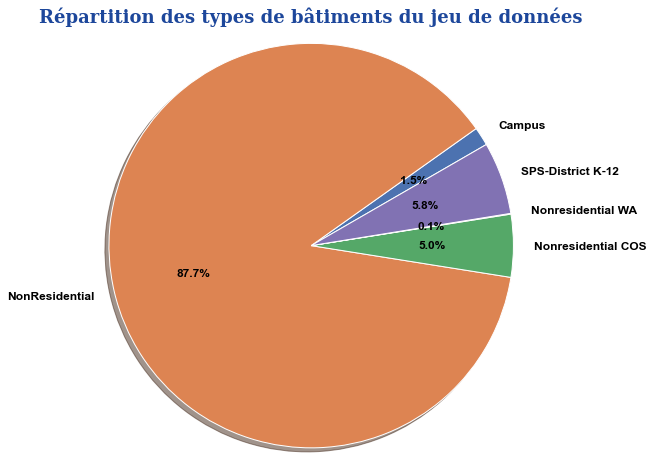

In [106]:
building_type = beb_df.groupby(by='BuildingType')['OSEBuildingID'].nunique()
font_title = {'family': 'serif', 'color':  '#1d479b', 'weight': 'bold','size': 18}

fig, ax = plt.subplots(figsize = (8,8))
ax.pie(building_type.values, labels=building_type.index, autopct='%1.1f%%', shadow=True, startangle=30, textprops = dict(color = "black",size = 12, weight = "bold"))
ax.axis('equal')
ax.set_title("Répartition des types de bâtiments du jeu de données", fontdict = font_title)
plt.show()

In [107]:
beb_df.loc[(beb_df['BuildingType'] == "NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    290
Other                          189
Warehouse                      180
Large Office                   168
Mixed Use Property             103
Retail Store                    92
Hotel                           75
Worship Facility                70
Distribution Center             51
Medical Office                  41
Supermarket / Grocery Store     40
K-12 School                     39
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Non-Refrigerated Warehouse       2
Restaurant\n                     1
Low-Rise Multifamily             1
Name: PrimaryPropertyType, dtype: int64

In [108]:
regex = re.compile(r'[\n\r\t]')
beb_df['PrimaryPropertyType'] = [regex.sub("", item) for index, item in beb_df.PrimaryPropertyType.iteritems()]

beb_df.loc[(beb_df['BuildingType'] == "NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    290
Other                          189
Warehouse                      180
Large Office                   168
Mixed Use Property             103
Retail Store                    92
Hotel                           75
Worship Facility                70
Distribution Center             51
Medical Office                  41
Supermarket / Grocery Store     40
K-12 School                     39
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Restaurant                      12
Refrigerated Warehouse          12
Hospital                        10
Laboratory                      10
Non-Refrigerated Warehouse       2
Low-Rise Multifamily             1
Name: PrimaryPropertyType, dtype: int64

In [109]:
beb_df['BuildingType'].value_counts()

NonResidential        1471
SPS-District K-12       97
Nonresidential COS      84
Campus                  25
Nonresidential WA        1
Name: BuildingType, dtype: int64

In [110]:
index_to_drop = beb_df[beb_df['BuildingType'] == "Nonresidential WA"].index
beb_df.drop(index_to_drop, inplace = True)

### V-2-Les années de construction des batiments

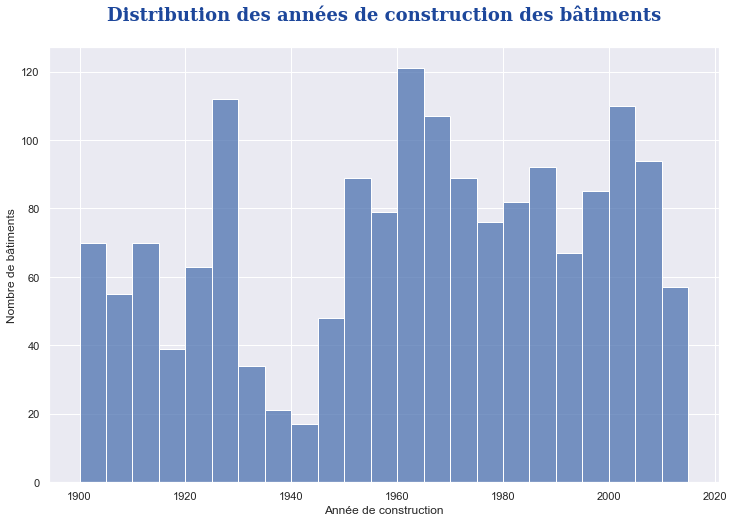

In [112]:
fig = plt.figure(figsize = (12,8))
ax = sns.histplot(data = beb_df, x = 'YearBuilt', bins = int((beb_df.YearBuilt.max() - beb_df.YearBuilt.min())/5))
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n", fontdict = font_title)
plt.show()

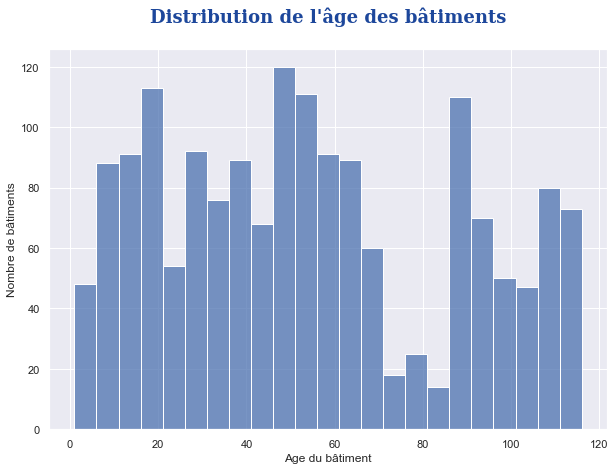

In [113]:
beb_df['BuildingAge'] = beb_df['DataYear'] - beb_df['YearBuilt']


fig = plt.figure(figsize=(10,7))
ax = sns.histplot(data=beb_df, x='BuildingAge', bins=int((beb_df.BuildingAge.max() - beb_df.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n", fontdict=font_title)
plt.show()

In [114]:
var_exam = ['YearBuilt','PropertyGFATotal','SiteEnergyUse(kBtu)',
               'TotalGHGEmissions','GHGEmissionsIntensity']

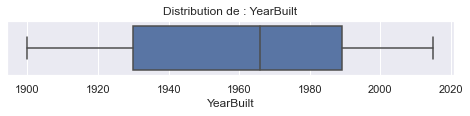

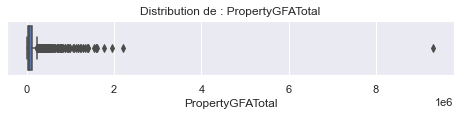

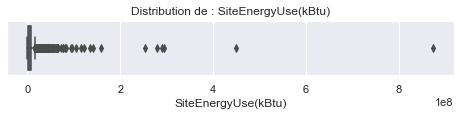

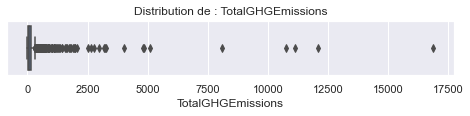

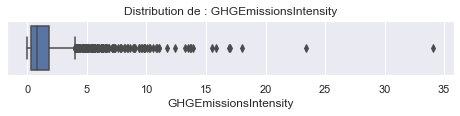

In [115]:
for column in var_exam:
    plt.figure(figsize = (8,1))
    
    sns.boxplot(x=beb_df[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

In [116]:
beb_df[beb_df['PropertyGFATotal']>9000000]

OSEBuildingID  DataYear BuildingType PrimaryPropertyType  \
1657          49967      2016       Campus          University   

                                   PropertyName                    Address  \
1657  University of Washington - Seattle Campus  NE 45th St & Brooklyn Ave   

         City State  ZipCode TaxParcelIdentificationNumber  ...  \
1657  Seattle    WA  98105.0                    1625049001  ...   

      ENERGYSTARScore SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  \
1657              NaN        93.800003          246.600006   

      SiteEnergyUse(kBtu)  SteamUse(kBtu) Electricity(kBtu) NaturalGas(kBtu)  \
1657          873923712.0      84985240.0       657074389.0              0.0   

     TotalGHGEmissions GHGEmissionsIntensity BuildingAge  
1657          11140.56                   1.2         116  

[1 rows x 40 columns]

In [117]:
index_to_drop = beb_df[beb_df['PropertyGFATotal']>9000000].index
beb_df.drop(index_to_drop, inplace = True)

In [118]:
beb_df[beb_df['SiteEnergyUse(kBtu)']>6e8]

Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, ListOfAllPropertyUseTypes, LargestPropertyUseType, SecondLargestPropertyUseType, ThirdLargestPropertyUseType, YearsENERGYSTARCertified, DefaultData, ComplianceStatus, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, SiteEUI(kBtu/sf), SourceEUI(kBtu/sf), SiteEnergyUse(kBtu), SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu), TotalGHGEmissions, GHGEmissionsIntensity, BuildingAge]
Index: []

[0 rows x 40 columns]

In [47]:
beb_df['PropertyGFATotal'].describe()

count    1.676000e+03
mean     1.136587e+05
std      1.939956e+05
min      1.128500e+04
25%      2.941275e+04
50%      4.948950e+04
75%      1.069760e+05
max      2.200000e+06
Name: PropertyGFATotal, dtype: float64

In [43]:
#Cette fonction nous permet de visualiser la répartition d'émissions de CO2 
def visualisation(variable, beb_df):
    
    the_mean=beb_df["TotalGHGEmissions"].mean()
    fig=plt.figure(figsize=[18,7])
    fig.patch.set_facecolor('#E0E0E0')
    fig.patch.set_alpha(0.7)
    plt.title("Distribution de l'emission du CO2 par {}".format(variable),size=16)
    sns.boxplot(x=variable, y="TotalGHGEmissions", data=beb_df,color="#cbd1db",width=0.5,showfliers=False,showmeans=True)
    plt.hlines(y=the_mean,xmin=-0.5,xmax=len(beb_df[variable].unique())-0.5,color="#6d788b",ls="--",label="Global mean")

    plt.ylabel("Emission CO2",size=14)
    plt.xticks(range(0,len(beb_df[variable].unique())), beb_df[variable].unique(),rotation=90)
    plt.legend()
    plt.grid()
    plt.show()

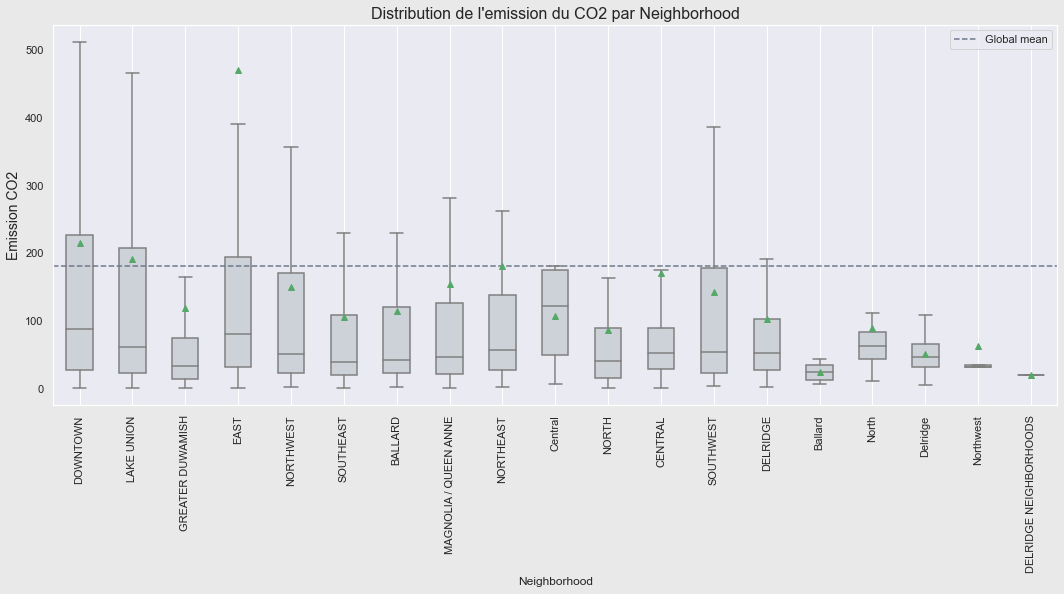

In [44]:
visualisation('Neighborhood',beb_df)

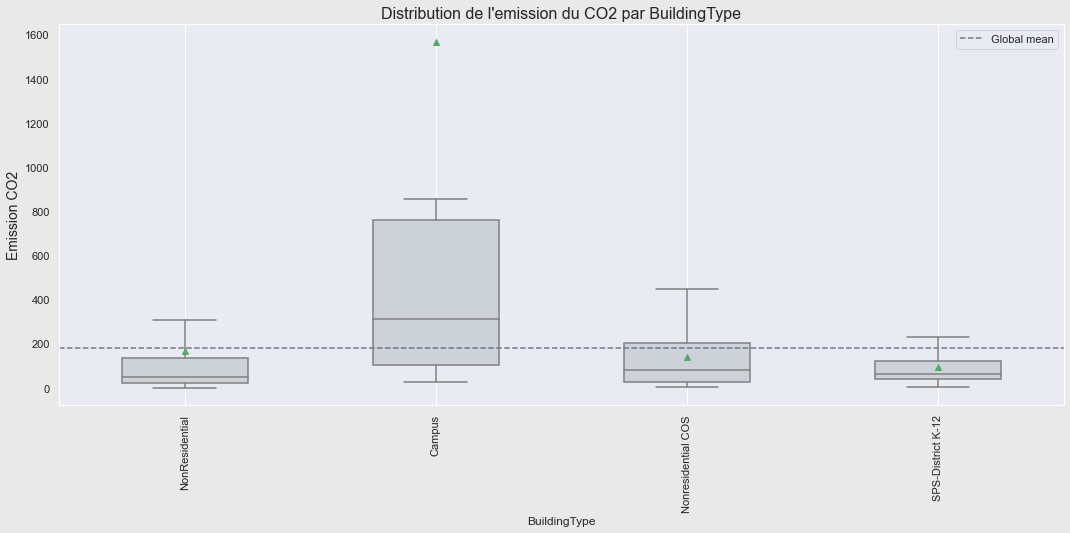

In [45]:
visualisation('BuildingType', beb_df)

### V-3-Analyses 

### V-3-1-Corrélations linéaires 

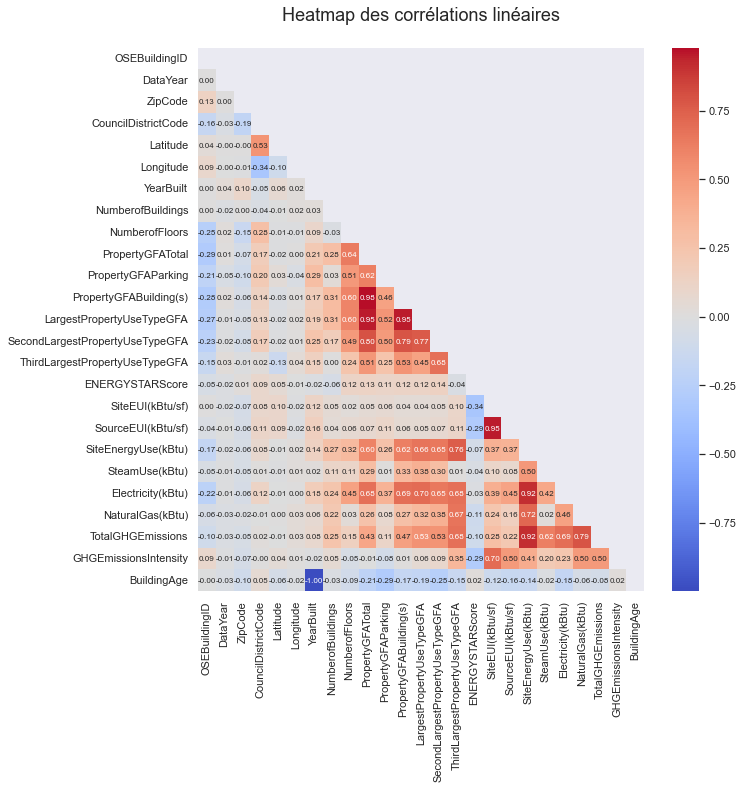

In [120]:
corr = beb_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", fontsize = 18)
plt.show()

In [121]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

level_0                          level_1  corr_coeff
28     PropertyGFABuilding(s)                 PropertyGFATotal    0.980197
26           PropertyGFATotal        LargestPropertyUseTypeGFA    0.953995
24  LargestPropertyUseTypeGFA           PropertyGFABuilding(s)    0.953237
22         SourceEUI(kBtu/sf)                 SiteEUI(kBtu/sf)    0.951796
20          TotalGHGEmissions              SiteEnergyUse(kBtu)    0.916877
18        SiteEnergyUse(kBtu)                Electricity(kBtu)    0.916369
16           PropertyGFATotal  SecondLargestPropertyUseTypeGFA    0.801618
14          TotalGHGEmissions                 NaturalGas(kBtu)    0.790924
12     PropertyGFABuilding(s)  SecondLargestPropertyUseTypeGFA    0.788654
10  LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA    0.767007
8         SiteEnergyUse(kBtu)   ThirdLargestPropertyUseTypeGFA    0.757212
6         SiteEnergyUse(kBtu)                 NaturalGas(kBtu)    0.724366
4   LargestPropertyUseTypeGFA                Electricity(kBtu)    0.704234
2       GHGEmissionsIntensity                 SiteEUI(kBtu/sf)    0.703809
0                   YearBuilt                      BuildingAge   -0.999993

In [122]:
def split_words(beb_df, column = None):
  list_words = set()
  for word in beb_df[column].str.split(','):
    if isinstance(word, float):
      continue
    list_words = set().union(word, list_words)
  return list(list_words)

In [123]:
list_use_type = split_words(beb_df, 'ListOfAllPropertyUseTypes')
print("Nombre de type d'usages dans la base : {}".format(len(list_use_type)))

Nombre de type d'usages dans la base : 117


In [124]:
beb_df['TotalUseTypeNumber'] = [str(word).count(",") + 1 for word in beb_df['ListOfAllPropertyUseTypes'].str.split(',')]
beb_df.drop('ListOfAllPropertyUseTypes', axis=1, inplace=True)

In [125]:
gfa_features = search_suffixe(beb_df, suffix='GFA')
beb_df[['TotalUseTypeNumber'] + gfa_features].head(10)

TotalUseTypeNumber  PropertyGFATotal  PropertyGFAParking  \
0                   1          111077.0                 0.0   
1                   1           98370.0             25920.0   
2                   5          193788.0             37854.0   
3                   2           76598.0             21410.0   
4                   2          186971.0                 0.0   
5                   1           66968.0                 0.0   
6                   2          434475.0            250000.0   
7                   2          192960.0             32160.0   
8                   1           54171.0                 0.0   
9                   3           83448.0             15479.0   

   PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
0                111077.0                        NaN   
1                 72450.0                    98370.0   
2                155934.0                   138672.0   
3                 55188.0                    55188.0   
4                186971.0                   186977.0   
5                 66968.0                        NaN   
6                184475.0                   434475.0   
7                160800.0                   135173.0   
8                 54171.0                        NaN   
9                 67969.0                    42527.0   

   SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  
0                              NaN                             NaN  
1                              NaN                             NaN  
2                          47539.0                         11166.0  
3                          21410.0                             NaN  
4                         115477.0                             NaN  
5                              NaN                             NaN  
6                         250000.0                             NaN  
7                          32000.0                             NaN  
8                              NaN                             NaN  
9                          27961.0                           529.0

In [119]:
beb_df.describe().transpose()

count          mean           std  \
OSEBuildingID                    3092.0  1.578910e+04  1.336046e+04   
DataYear                         3092.0  2.015503e+03  5.000704e-01   
Latitude                         3092.0  4.761660e+01  4.805087e-02   
Longitude                        3092.0 -1.223331e+02  2.460371e-02   
YearBuilt                        3092.0  1.961921e+03  3.287116e+01   
NumberofBuildings                3092.0  1.104140e+00  1.160449e+00   
NumberofFloors                   3092.0  4.206986e+00  6.639965e+00   
PropertyGFATotal                 3092.0  1.151764e+05  1.968158e+05   
PropertyGFAParking               3092.0  1.382644e+04  4.460423e+04   
PropertyGFABuilding(s)           3092.0  1.013499e+05  1.733645e+05   
LargestPropertyUseTypeGFA        3092.0  9.199982e+04  1.605133e+05   
SecondLargestPropertyUseTypeGFA  3092.0  1.871290e+04  5.152365e+04   
ThirdLargestPropertyUseTypeGFA   3092.0  3.061673e+03  1.644939e+04   
ENERGYSTARScore                  2074.0  6.435873e+01  2.828107e+01   
SiteEnergyUse(kBtu)              3092.0  8.015474e+06  2.062364e+07   
TotalGHGEmissions                3092.0  1.772042e+02  6.457601e+02   
GHGEmissionsIntensity            3092.0  1.500741e+00  2.173378e+00   
BuildingAge                      3092.0  5.358247e+01  3.286795e+01   

                                         min           25%           50%  \
OSEBuildingID                        1.00000  5.727500e+02  2.110250e+04   
DataYear                          2015.00000  2.015000e+03  2.016000e+03   
Latitude                            47.49917  4.758700e+01  4.761279e+01   
Longitude                         -122.41182 -1.223436e+02 -1.223331e+02   
YearBuilt                         1900.00000  1.930000e+03  1.966000e+03   
NumberofBuildings                    1.00000  1.000000e+00  1.000000e+00   
NumberofFloors                       1.00000  1.000000e+00  2.000000e+00   
PropertyGFATotal                 11285.00000  2.963100e+04  4.948950e+04   
PropertyGFAParking                   0.00000  0.000000e+00  0.000000e+00   
PropertyGFABuilding(s)            3636.00000  2.876000e+04  4.763750e+04   
LargestPropertyUseTypeGFA            0.00000  2.452000e+04  4.264100e+04   
SecondLargestPropertyUseTypeGFA      0.00000  0.000000e+00  0.000000e+00   
ThirdLargestPropertyUseTypeGFA       0.00000  0.000000e+00  0.000000e+00   
ENERGYSTARScore                      1.00000  4.700000e+01  7.200000e+01   
SiteEnergyUse(kBtu)              16808.90039  1.262251e+06  2.641331e+06   
TotalGHGEmissions                    0.12000  2.077500e+01  5.057500e+01   
GHGEmissionsIntensity                0.00000  2.800000e-01  8.000000e-01   
BuildingAge                          1.00000  2.600000e+01  5.000000e+01   

                                          75%           max  
OSEBuildingID                    2.453700e+04  5.022600e+04  
DataYear                         2.016000e+03  2.016000e+03  
Latitude                         4.764975e+01  4.773387e+01  
Longitude                       -1.223218e+02 -1.222586e+02  
YearBuilt                        1.989000e+03  2.015000e+03  
NumberofBuildings                1.000000e+00  3.900000e+01  
NumberofFloors                   4.000000e+00  9.900000e+01  
PropertyGFATotal                 1.070380e+05  2.200000e+06  
PropertyGFAParking               0.000000e+00  5.126080e+05  
PropertyGFABuilding(s)           9.506750e+04  2.200000e+06  
LargestPropertyUseTypeGFA        8.969900e+04  1.719643e+06  
SecondLargestPropertyUseTypeGFA  1.272700e+04  6.867500e+05  
ThirdLargestPropertyUseTypeGFA   0.000000e+00  4.597480e+05  
ENERGYSTARScore                  8.800000e+01  1.000000e+02  
SiteEnergyUse(kBtu)              7.222659e+06  4.483853e+08  
TotalGHGEmissions                1.433675e+02  1.687098e+04  
GHGEmissionsIntensity            1.790000e+00  3.409000e+01  
BuildingAge                      8.600000e+01  1.160000e+02

In [126]:
# Calcul des ratios
beb_df['GFABuildingRate'] = (round((beb_df['PropertyGFABuilding(s)'].fillna(0)
                                  /beb_df['PropertyGFATotal'].fillna(0)),5))
beb_df['GFAParkingRate'] = (round((beb_df['PropertyGFAParking'].fillna(0)
                                 /beb_df['PropertyGFATotal'].fillna(0)),5))

# Suppression des variables inutiles
beb_df.drop(['LargestPropertyUseTypeGFA', 
           'SecondLargestPropertyUseTypeGFA',
           'SecondLargestPropertyUseType',
           'ThirdLargestPropertyUseTypeGFA',
           'ThirdLargestPropertyUseType',
           'PropertyGFAParking',
           'PropertyGFABuilding(s)'],
         axis=1, inplace=True)

#On complète les usages de la partie la plus large
beb_df['LargestPropertyUseType'] = beb_df['LargestPropertyUseType'].fillna("Unknown")
beb_df['NumberofFloors'] = beb_df['NumberofFloors'].fillna(1)

In [127]:
#Nous pouvons également calculer la surface moyenne par bâtiment et par étage
beb_df['GFAPerBuilding'] = round((beb_df['PropertyGFATotal'] / beb_df['NumberofBuildings']),3)
beb_df['GFAPerFloor'] = round((beb_df['PropertyGFATotal'] / beb_df['NumberofFloors']),3)

In [128]:
beb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 0 to 1697
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  1676 non-null   int64  
 1   DataYear                       1676 non-null   int64  
 2   BuildingType                   1676 non-null   object 
 3   PrimaryPropertyType            1676 non-null   object 
 4   PropertyName                   1676 non-null   object 
 5   Address                        1676 non-null   object 
 6   City                           1676 non-null   object 
 7   State                          1676 non-null   object 
 8   ZipCode                        1660 non-null   float64
 9   TaxParcelIdentificationNumber  1676 non-null   object 
 10  CouncilDistrictCode            1676 non-null   int64  
 11  Neighborhood                   1676 non-null   object 
 12  Latitude                       1676 non-null   f

In [61]:
beb_df.describe().transpose()

count          mean           std          min  \
OSEBuildingID          1676.0  1.625882e+04  1.379730e+04      1.00000   
DataYear               1676.0  2.015984e+03  1.259354e-01   2015.00000   
ZipCode                1660.0  9.811680e+04  1.832552e+01  98006.00000   
CouncilDistrictCode    1676.0  4.369332e+00  2.192577e+00      1.00000   
Latitude               1676.0  4.761616e+01  4.814889e-02     47.49917   
Longitude              1676.0 -1.223329e+02  2.458861e-02   -122.41182   
YearBuilt              1676.0  1.962038e+03  3.271766e+01   1900.00000   
NumberofBuildings      1676.0  1.083831e+00  8.887260e-01      0.50000   
NumberofFloors         1676.0  4.123508e+00  6.553907e+00      0.00000   
PropertyGFATotal       1676.0  1.136587e+05  1.939956e+05  11285.00000   
ENERGYSTARScore        1141.0  6.469106e+01  2.794645e+01      1.00000   
SiteEUI(kBtu/sf)       1676.0  7.246882e+01  7.322237e+01      0.00000   
SourceEUI(kBtu/sf)     1676.0  1.769191e+02  1.823101e+02      0.00000   
SiteEnergyUse(kBtu)    1676.0  7.993189e+06  2.164960e+07      0.00000   
SteamUse(kBtu)         1676.0  4.690378e+05  4.973475e+06      0.00000   
Electricity(kBtu)      1676.0  5.503049e+06  1.337795e+07      7.00000   
NaturalGas(kBtu)       1676.0  1.994887e+06  9.457292e+06      0.00000   
TotalGHGEmissions      1676.0  1.805157e+02  7.005405e+02      0.38500   
GHGEmissionsIntensity  1676.0  1.517151e+00  2.276121e+00      0.00500   
BuildingAge            1676.0  5.394570e+01  3.271321e+01      1.00000   
TotalUseTypeNumber     1676.0  1.896778e+00  1.225876e+00      1.00000   
GFABuildingRate        1676.0  9.369349e-01  1.396997e-01     -0.25116   
GFAParkingRate         1676.0  6.306506e-02  1.396997e-01     -0.00001   
GFAPerBuilding         1676.0  1.103444e+05  1.887010e+05   7166.66700   
GFAPerFloor            1676.0           inf           NaN    221.69700   

                                25%           50%           75%           max  
OSEBuildingID          5.807500e+02  2.114050e+04  2.459925e+04  5.022600e+04  
DataYear               2.016000e+03  2.016000e+03  2.016000e+03  2.016000e+03  
ZipCode                9.810500e+04  9.810900e+04  9.812425e+04  9.819900e+04  
CouncilDistrictCode    2.000000e+00  4.000000e+00  7.000000e+00  7.000000e+00  
Latitude               4.758573e+01  4.761242e+01  4.764936e+01  4.773387e+01  
Longitude             -1.223433e+02 -1.223330e+02 -1.223217e+02 -1.222586e+02  
YearBuilt              1.930000e+03  1.966000e+03  1.989000e+03  2.015000e+03  
NumberofBuildings      1.000000e+00  1.000000e+00  1.000000e+00  2.000000e+01  
NumberofFloors         1.000000e+00  2.000000e+00  4.000000e+00  9.900000e+01  
PropertyGFATotal       2.941275e+04  4.948950e+04  1.069760e+05  2.200000e+06  
ENERGYSTARScore        4.650000e+01  7.200000e+01  8.800000e+01  1.000000e+02  
SiteEUI(kBtu/sf)       3.371250e+01  5.197500e+01  8.278750e+01  8.344000e+02  
SourceEUI(kBtu/sf)     7.808750e+01  1.327500e+02  2.071625e+02  2.620000e+03  
SiteEnergyUse(kBtu)    1.242004e+06  2.570824e+06  7.000638e+06  4.483853e+08  
SteamUse(kBtu)         0.000000e+00  0.000000e+00  0.000000e+00  1.314066e+08  
Electricity(kBtu)      7.402980e+05  1.665665e+06  4.883798e+06  2.796294e+08  
NaturalGas(kBtu)       0.000000e+00  5.060188e+05  1.522630e+06  2.979090e+08  
TotalGHGEmissions      2.053875e+01  5.095250e+01  1.411338e+02  1.687098e+04  
GHGEmissionsIntensity  2.800000e-01  7.975000e-01  1.773750e+00  3.409000e+01  
BuildingAge            2.700000e+01  5.000000e+01  8.600000e+01  1.160000e+02  
TotalUseTypeNumber     1.000000e+00  2.000000e+00  2.000000e+00  1.300000e+01  
GFABuildingRate        1.000000e+00  1.000000e+00  1.000000e+00  1.000010e+00  
GFAParkingRate         0.000000e+00  0.000000e+00  0.000000e+00  1.251160e+00  
GFAPerBuilding         2.937000e+04  4.959000e+04  1.053250e+05  2.761918e+06  
GFAPerFloor            1.329799e+04  2.298983e+04  3.824188e+04           inf

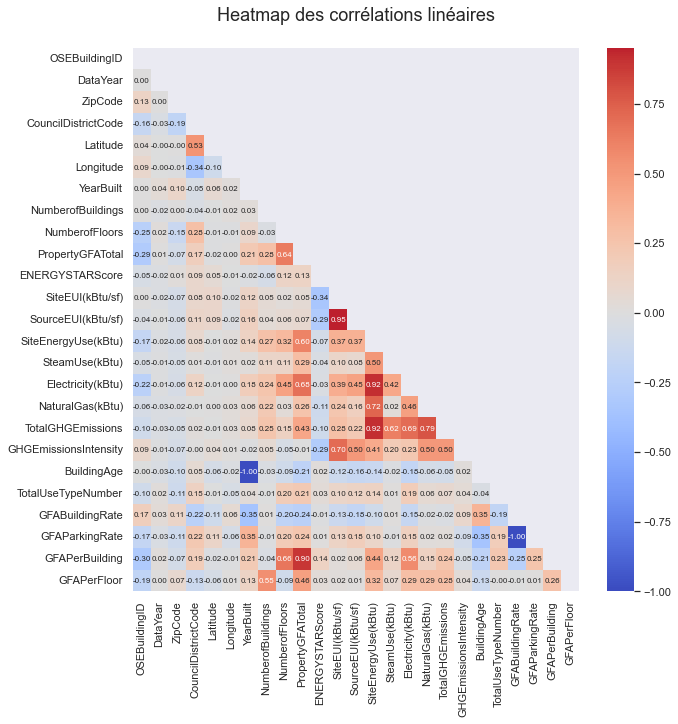

In [129]:
corr = beb_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", fontsize = 18)
plt.show()

In [130]:
threshold_up = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold_up)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & 
                          (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

level_0              level_1  corr_coeff
16     SourceEUI(kBtu/sf)     SiteEUI(kBtu/sf)    0.951796
14      TotalGHGEmissions  SiteEnergyUse(kBtu)    0.916877
12      Electricity(kBtu)  SiteEnergyUse(kBtu)    0.916369
10       PropertyGFATotal       GFAPerBuilding    0.896308
8       TotalGHGEmissions     NaturalGas(kBtu)    0.790924
6     SiteEnergyUse(kBtu)     NaturalGas(kBtu)    0.724366
4   GHGEmissionsIntensity     SiteEUI(kBtu/sf)    0.703809
2             BuildingAge            YearBuilt   -0.999993
0         GFABuildingRate       GFAParkingRate   -1.000000

In [131]:
strong_corr_features = list(set(list(strong_corr['level_0'].values) + list(strong_corr['level_1'].values)))
X = beb_df[strong_corr_features].replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(len(X.columns))]
vif_data[vif_data['VIF'] > 5]

feature           VIF
0               YearBuilt  6.856092e+04
1          GFAParkingRate  6.115872e+06
2             BuildingAge  6.857006e+04
3      SourceEUI(kBtu/sf)  4.024411e+01
4        NaturalGas(kBtu)  2.538317e+01
5   GHGEmissionsIntensity  9.632580e+00
6          GFAPerBuilding  6.394035e+00
7       Electricity(kBtu)  3.881258e+02
8        SiteEUI(kBtu/sf)  5.883360e+01
9        PropertyGFATotal  8.282023e+00
10        GFABuildingRate  2.337290e+08
11      TotalGHGEmissions  2.215894e+02
12    SiteEnergyUse(kBtu)  1.199400e+03

In [66]:
#Eui_features = search_suffixe(beb_df, suffix='EUI(kBtu/sf)')
#beb_df.drop(Eui_features, axis=1, inplace=True)

In [132]:
Eui_features = search_suffixe(beb_df, suffix='EUI(kBtu/sf)') + ['GHGEmissionsIntensity']
beb_df.drop(Eui_features, axis=1, inplace=True)

### V-3-2-Analyse des variables à prédire 

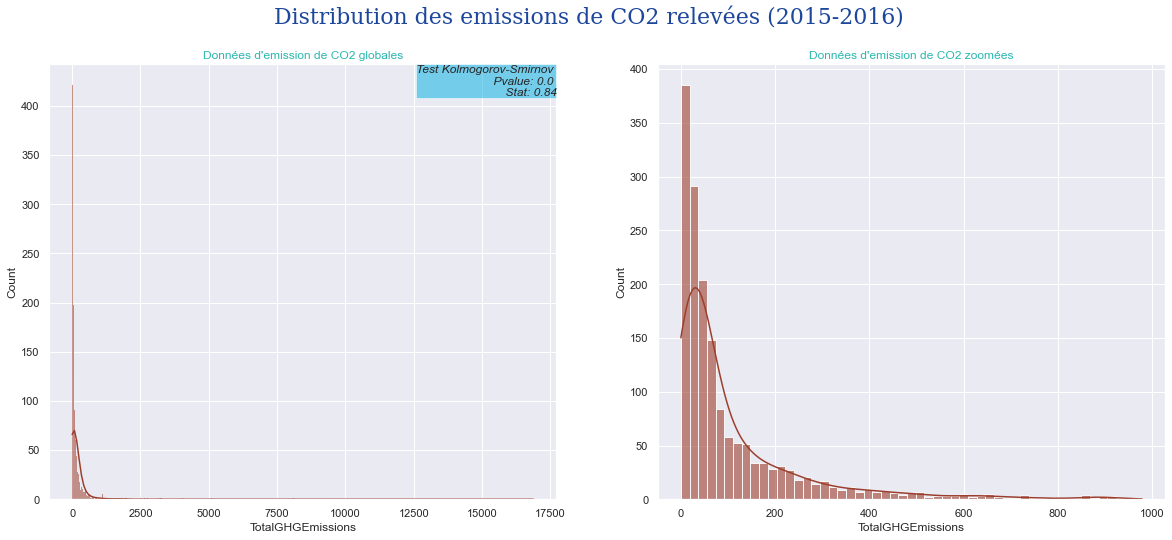

In [133]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height

sns.histplot(data=beb_df, x="TotalGHGEmissions", kde=True, ax=axes[0], color="#9C3E2D", alpha=0.6)
axes[0].set_title("Données d'emission de CO2 globales", color='#2cb7b0')

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(beb_df['TotalGHGEmissions'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=beb_df[(beb_df['TotalGHGEmissions']< 1000)], x="TotalGHGEmissions", kde=True, ax=axes[1], color="#9C3E2D", alpha=0.6)
axes[1].set_title("Données d'emission de CO2 zoomées", color='#2cb7b0')

plt.suptitle("Distribution des emissions de CO2 relevées (2015-2016)", 
             fontdict=font_title, fontsize=22)
plt.show()

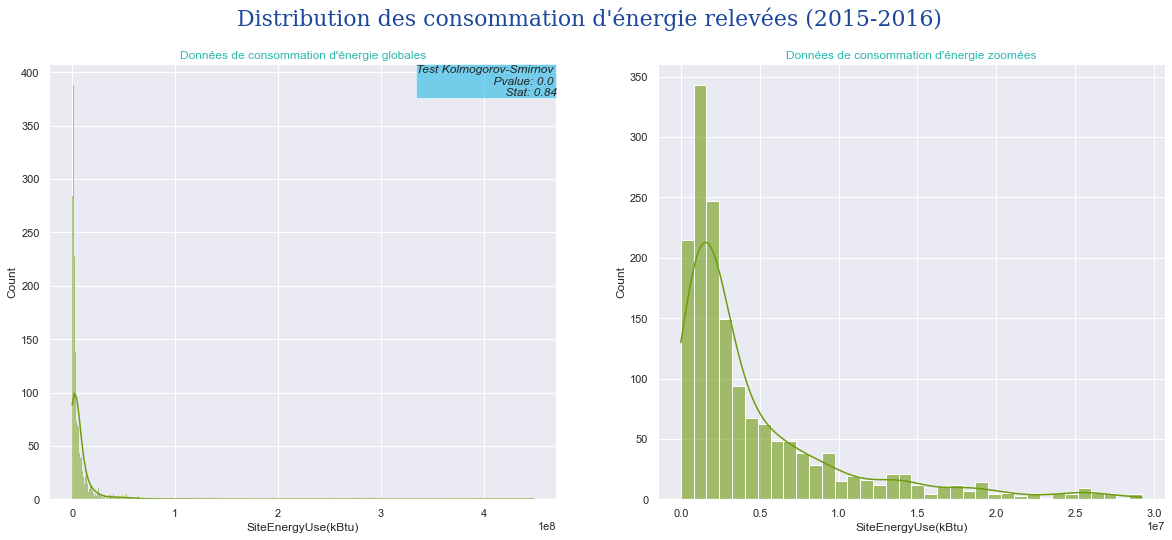

In [134]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))

sns.histplot(data=beb_df, x="SiteEnergyUse(kBtu)", kde=True, ax=axes[0], color="#6D9C0E", alpha=0.6)
axes[0].set_title("Données de consommation d'énergie globales", color='#2cb7b0')

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(beb_df['SiteEnergyUse(kBtu)'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=beb_df[(beb_df['SiteEnergyUse(kBtu)']< 0.3*10**8)], x="SiteEnergyUse(kBtu)", kde=True, ax=axes[1], color="#6D9C0E", alpha=0.6)
axes[1].set_title("Données de consommation d'énergie zoomées", color='#2cb7b0')

plt.suptitle("Distribution des consommation d'énergie relevées (2015-2016)", 
             fontdict=font_title, fontsize=22)
plt.show()

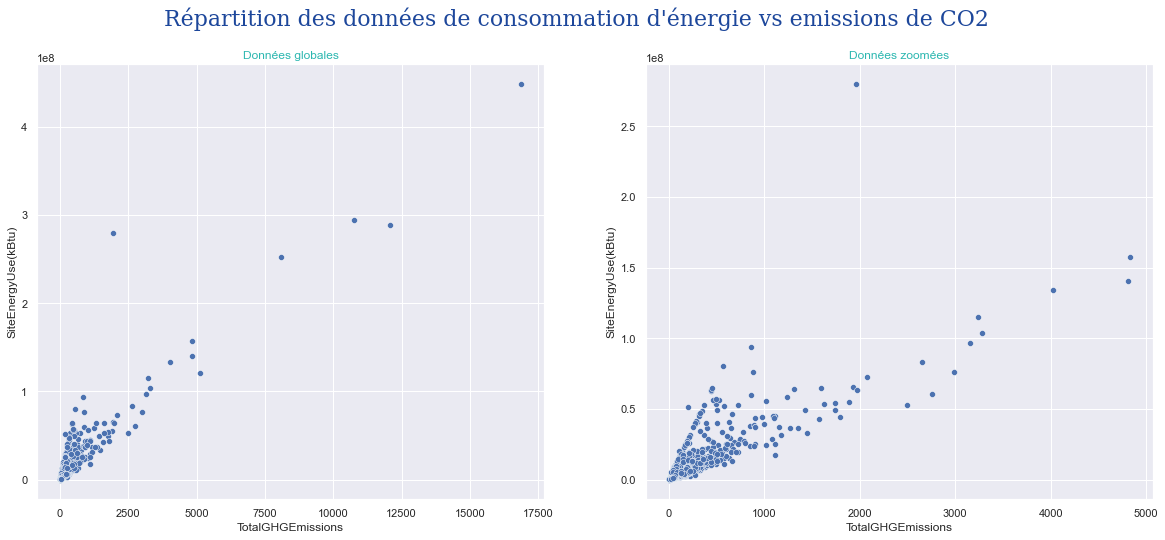

In [135]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=beb_df, x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.scatterplot(data=beb_df[(beb_df['TotalGHGEmissions'] < 5000)], x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=axes[1])
axes[1].set_title("Données zoomées", color='#2cb7b0')
plt.suptitle("Répartition des données de consommation d'énergie vs emissions de CO2", fontdict=font_title, fontsize=22)
plt.show()

In [136]:
#Coordonnées du centre de Seattle
seattle_lat = 47.6062
seattle_lon = -122.3321

def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles, en kilomètres retourne erreur
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

In [137]:
#Calcul des distance au centre de Seattle pour chaque point
beb_df['harvesine_distance'] = [haversine_distance(seattle_lat, seattle_lon, x, y) 
        for x, y in zip(beb_df.Latitude.astype(float), beb_df.Longitude.astype(float))]

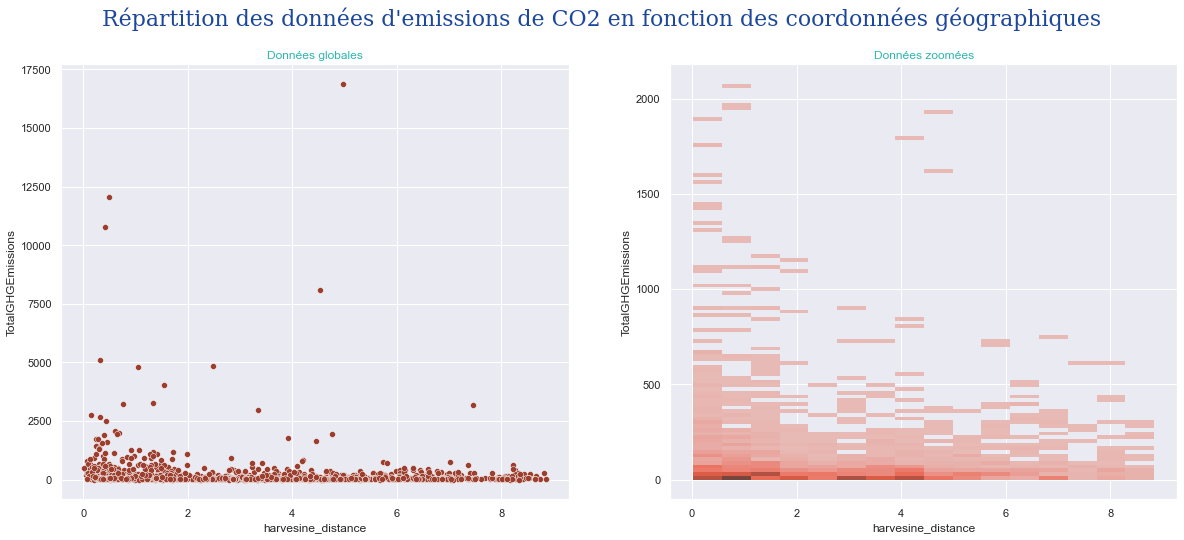

In [138]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=beb_df, y="TotalGHGEmissions", x="harvesine_distance", color="#9C3E2D", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.histplot(data=beb_df[(beb_df['TotalGHGEmissions'] < 2500)], y="TotalGHGEmissions", 
                x="harvesine_distance", color="#9C3E2D", ax=axes[1])
axes[1].set_title("Données zoomées", color='#2cb7b0')
plt.suptitle("Répartition des données d'emissions de CO2 en fonction des coordonnées géographiques", 
             fontdict=font_title, fontsize=22)
plt.show()

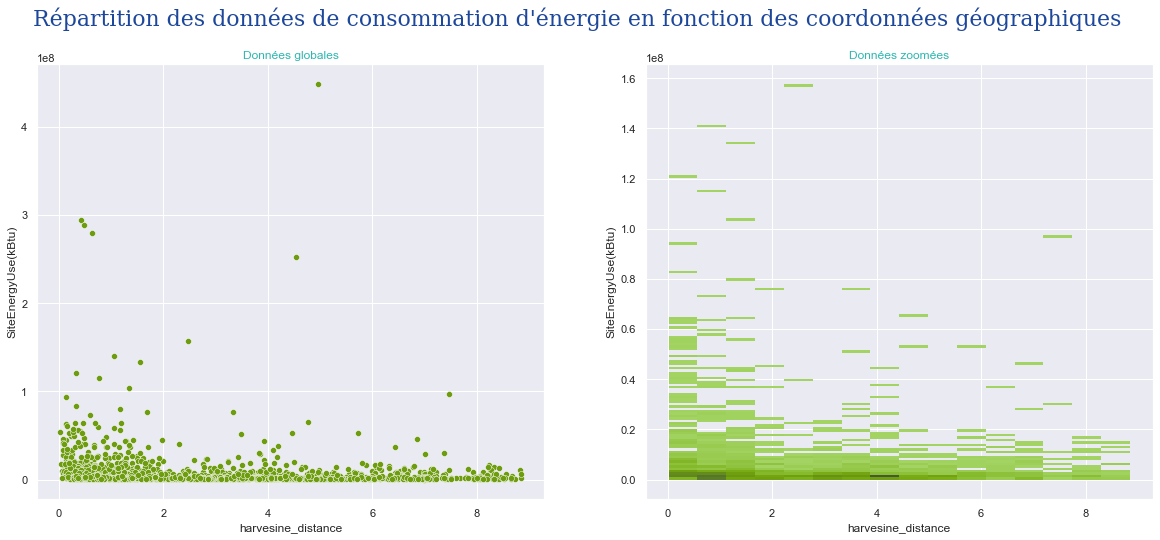

In [139]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=beb_df, y="SiteEnergyUse(kBtu)", x="harvesine_distance", color="#6D9C0E", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.histplot(data=beb_df[(beb_df['SiteEnergyUse(kBtu)'] < 2*10**8)], y="SiteEnergyUse(kBtu)", 
                x="harvesine_distance", color="#6D9C0E", ax=axes[1])
axes[1].set_title("Données zoomées", color='#2cb7b0')
plt.suptitle("Répartition des données de consommation d'énergie en fonction des coordonnées géographiques", 
             fontdict=font_title, fontsize=22)
plt.show()

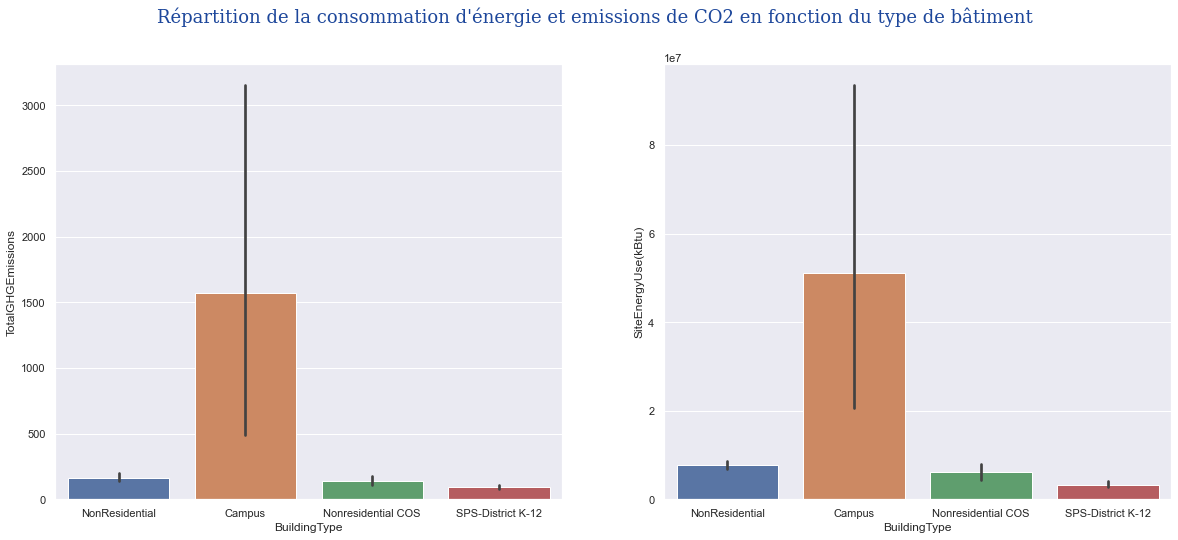

In [140]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.barplot(x='BuildingType',y='TotalGHGEmissions',data=beb_df, ax=axes[0])
sns.barplot(x='BuildingType',y='SiteEnergyUse(kBtu)',data=beb_df, ax=axes[1])
plt.suptitle("Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de bâtiment", 
             fontdict=font_title, fontsize=18)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

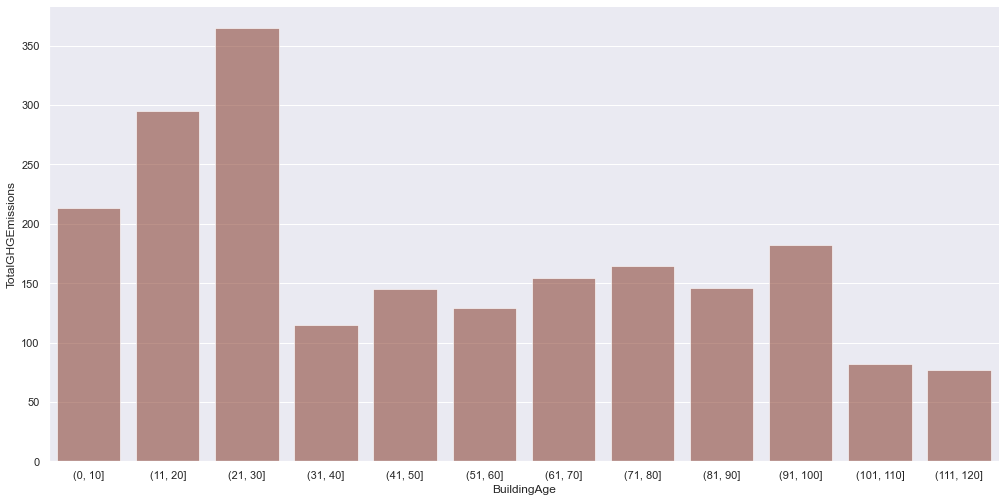

In [141]:
bins = pd.IntervalIndex.from_tuples([(0, 10), (11, 20), (21, 30), (31, 40), (41, 50), 
                                     (51, 60), (61, 70), (71,80), (81,90), (91,100), 
                                     (101, 110), (111, 120)])

sns.catplot(
    data=beb_df, kind="bar",
    x=pd.cut(beb_df['BuildingAge'], bins=bins), y="TotalGHGEmissions",
    ci=None, color="#9C3E2D", alpha=.6,
    height=7, aspect=2
)
plt.title("Influence de l'âge des bâtiments sur les émissions de CO2", fontdict=font_title)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

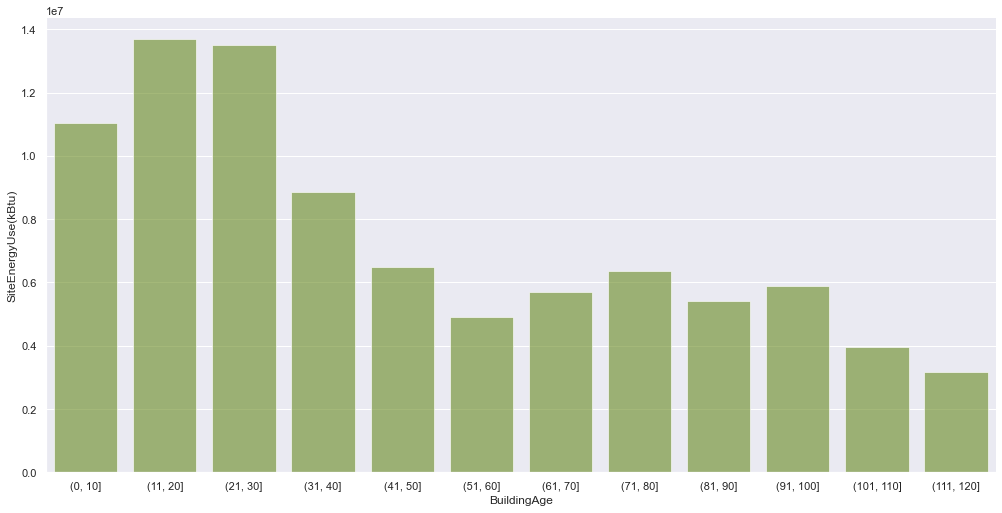

In [142]:
sns.catplot(
    data=beb_df, kind="bar",
    x=pd.cut(beb_df['BuildingAge'], bins=bins), y="SiteEnergyUse(kBtu)",
    ci=None, color="#6D9C0E", alpha=.6,
    height=7, aspect=2
)
plt.title("Influence de l'âge des bâtiments sur les consommations d'énergie", fontdict=font_title)
plt.show()

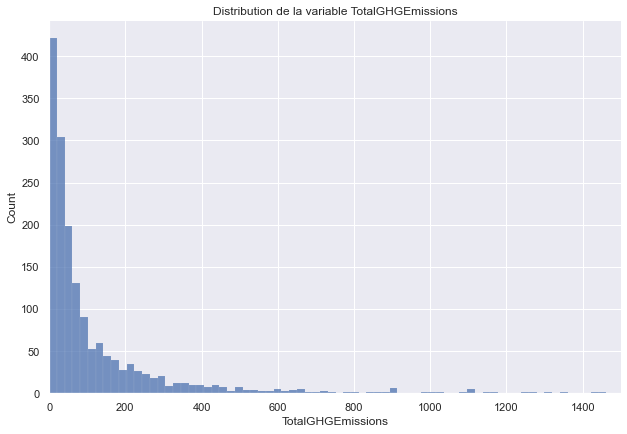

In [143]:
anaghg=sns.displot(beb_df['TotalGHGEmissions'], palette='bright', height=6, aspect=1.5)
plt.xlim(0,1500)
anaghg.set(title="Distribution de la variable TotalGHGEmissions") #déjà fait

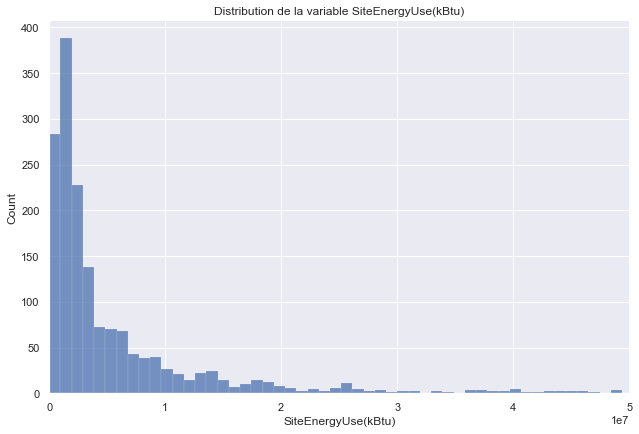

In [144]:
anaseu=sns.displot(beb_df['SiteEnergyUse(kBtu)'], palette='bright', height=6, aspect=1.5)
plt.xlim(0,0.5e8)
anaseu.set(title="Distribution de la variable SiteEnergyUse(kBtu)") #déjà fait

### VI-Nettoyage final 

In [145]:
beb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 0 to 1697
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  1676 non-null   int64  
 1   DataYear                       1676 non-null   int64  
 2   BuildingType                   1676 non-null   object 
 3   PrimaryPropertyType            1676 non-null   object 
 4   PropertyName                   1676 non-null   object 
 5   Address                        1676 non-null   object 
 6   City                           1676 non-null   object 
 7   State                          1676 non-null   object 
 8   ZipCode                        1660 non-null   float64
 9   TaxParcelIdentificationNumber  1676 non-null   object 
 10  CouncilDistrictCode            1676 non-null   int64  
 11  Neighborhood                   1676 non-null   object 
 12  Latitude                       1676 non-null   f

In [146]:
beb_df['ComplianceStatus'].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [147]:
print("Nombre de ligne identifiées comme non conforme : {}.".format(beb_df[beb_df['ComplianceStatus'] != "Compliant"].shape[0]))

Nombre de ligne identifiées comme non conforme : 103.


In [148]:
beb_df = beb_df[beb_df['ComplianceStatus'] == "Compliant"]

In [149]:
beb_df = beb_df.drop(['DefaultData','ComplianceStatus', 'City',
                  'TaxParcelIdentificationNumber','CouncilDistrictCode'], axis=1)

### VII-Localisation

In [150]:
seattle_map = folium.Map(location=[seattle_lat, seattle_lon], zoom_start=11)

#Clusters
marker_cluster = folium.plugins.MarkerCluster().add_to(seattle_map)
for lat, lng, in zip(beb_df.Latitude, beb_df.Longitude):
    folium.Marker(location=[lat, lng]).add_to(marker_cluster)

seattle_map

### VIII-Finalisation 

In [151]:
beb_df = beb_df.drop(['Latitude','Longitude'], axis=1)
beb_df.set_index('OSEBuildingID').to_csv('./datasets/beb_df_cleaned.csv')